## Introdução

### Nosso projeto tem a proposta de desenvolver a Alura_care, uma startup fictícia que tem por objetivo reduzir o número de exames necessários para o diagnóstico de um tipo específico de câncer.

In [1]:
import pandas as pd


In [14]:
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Objetivo reduzir a quantidade de exames para prever com mais precisão o diagnóstico de um tipo específico de câncer.

### Tratando os dados

In [16]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [5]:
419/559

0.7495527728085868

In [17]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


### Modelo de machine learning

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = df.drop(columns=['id', 'diagnostico'])
diagnostico = df.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, 
                                                        diagnostico,
                                                        test_size = 0.3)



classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))

Resultado da classificação 92.40%


In [30]:
from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy="most_frequent")
classificador_dummy.fit(treino_x, treino_y)
classificador_dummy.score(teste_x, teste_y)
print(f'Acurácia dummy: {round(classificador_dummy.score(teste_X, teste_y)*100, 2)}%')

Acurácia dummy: 66.67%


In [31]:
dados_plot = pd.concat([diagnostico, valores_exames_v1],axis = 1)
dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [32]:
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


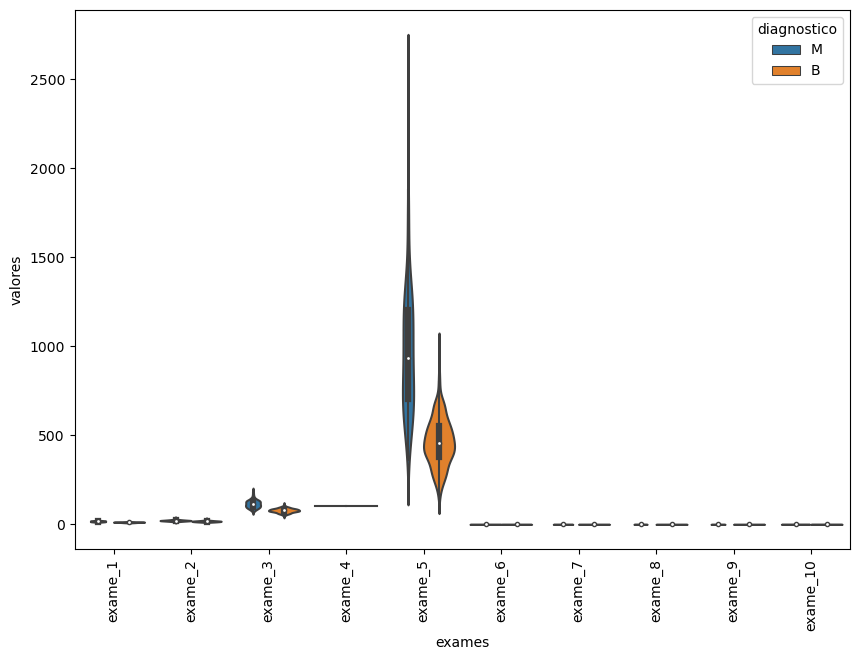

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt


dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]],axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')


plt.figure(figsize=(10, 7))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot)
plt.xticks(rotation = 90)
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

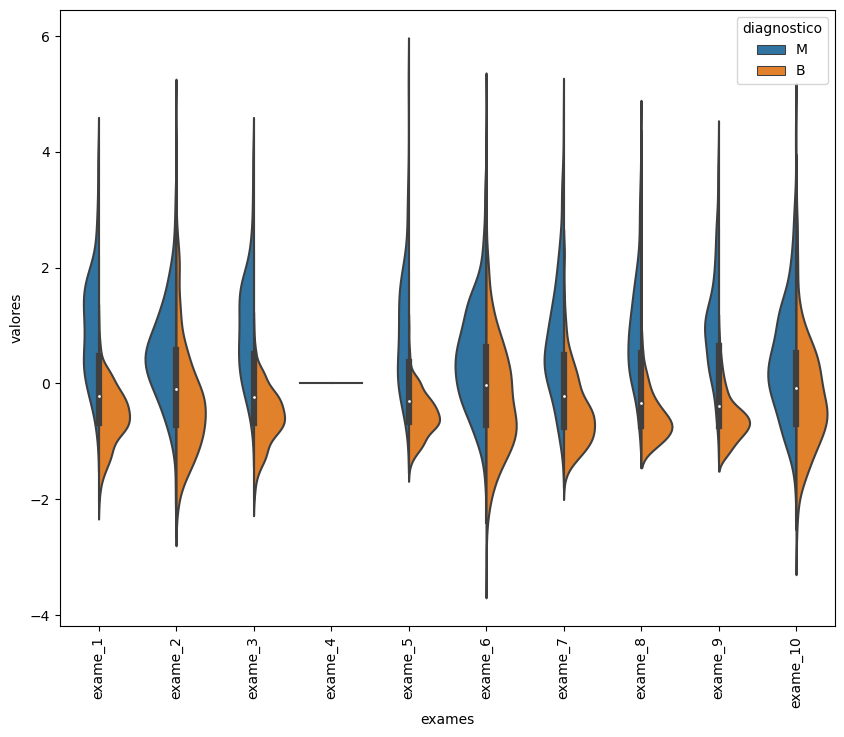

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2,
                                columns=valores_exames_v1.keys())

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]],axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                    var_name="exames",
                    value_name='valores')
plt.figure(figsize=(10, 8))
sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
               data = dados_plot, split= True)
plt.xticks(rotation = 90)
plt.show()

Exame 4 é constante. Pode excluir.

In [44]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [45]:
def grafico_violin(valores, inicio,fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]],axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico",
                        var_name="exames",
                        value_name='valores')
    plt.figure(figsize=(10, 8))
    sns.violinplot(x = "exames", y = "valores", hue = "diagnostico",
                   data = dados_plot, split= True)
    plt.xticks(rotation = 90)
    plt.show()

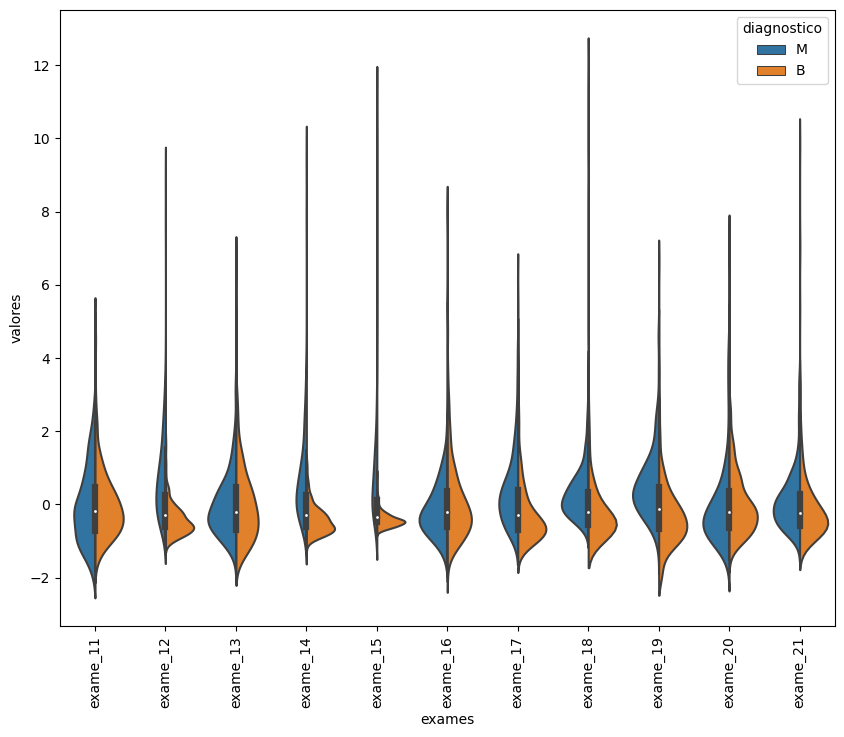

In [47]:
grafico_violin(valores_exames_v2, 10, 21)

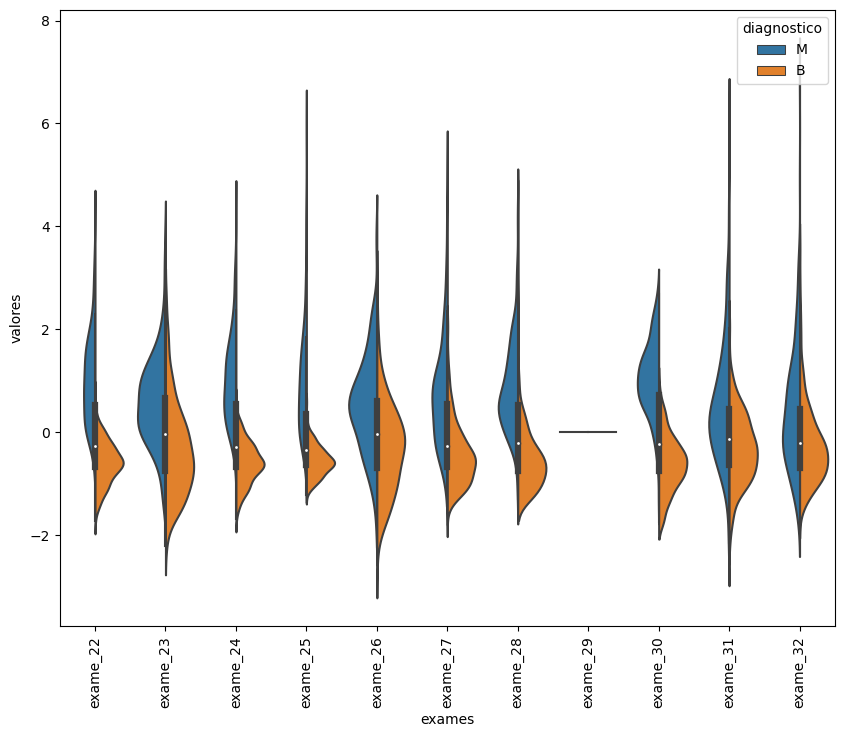

In [48]:
grafico_violin(valores_exames_v2, 21, 32)

In [50]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4', 'exame_29'])
def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, 
                                                        diagnostico,
                                                        test_size = 0.3)



    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" %(classificador.score(teste_x,teste_y)*100))
    

In [51]:
classificar(valores_exames_v3)

Resultado da classificação 92.98%


### Correlação

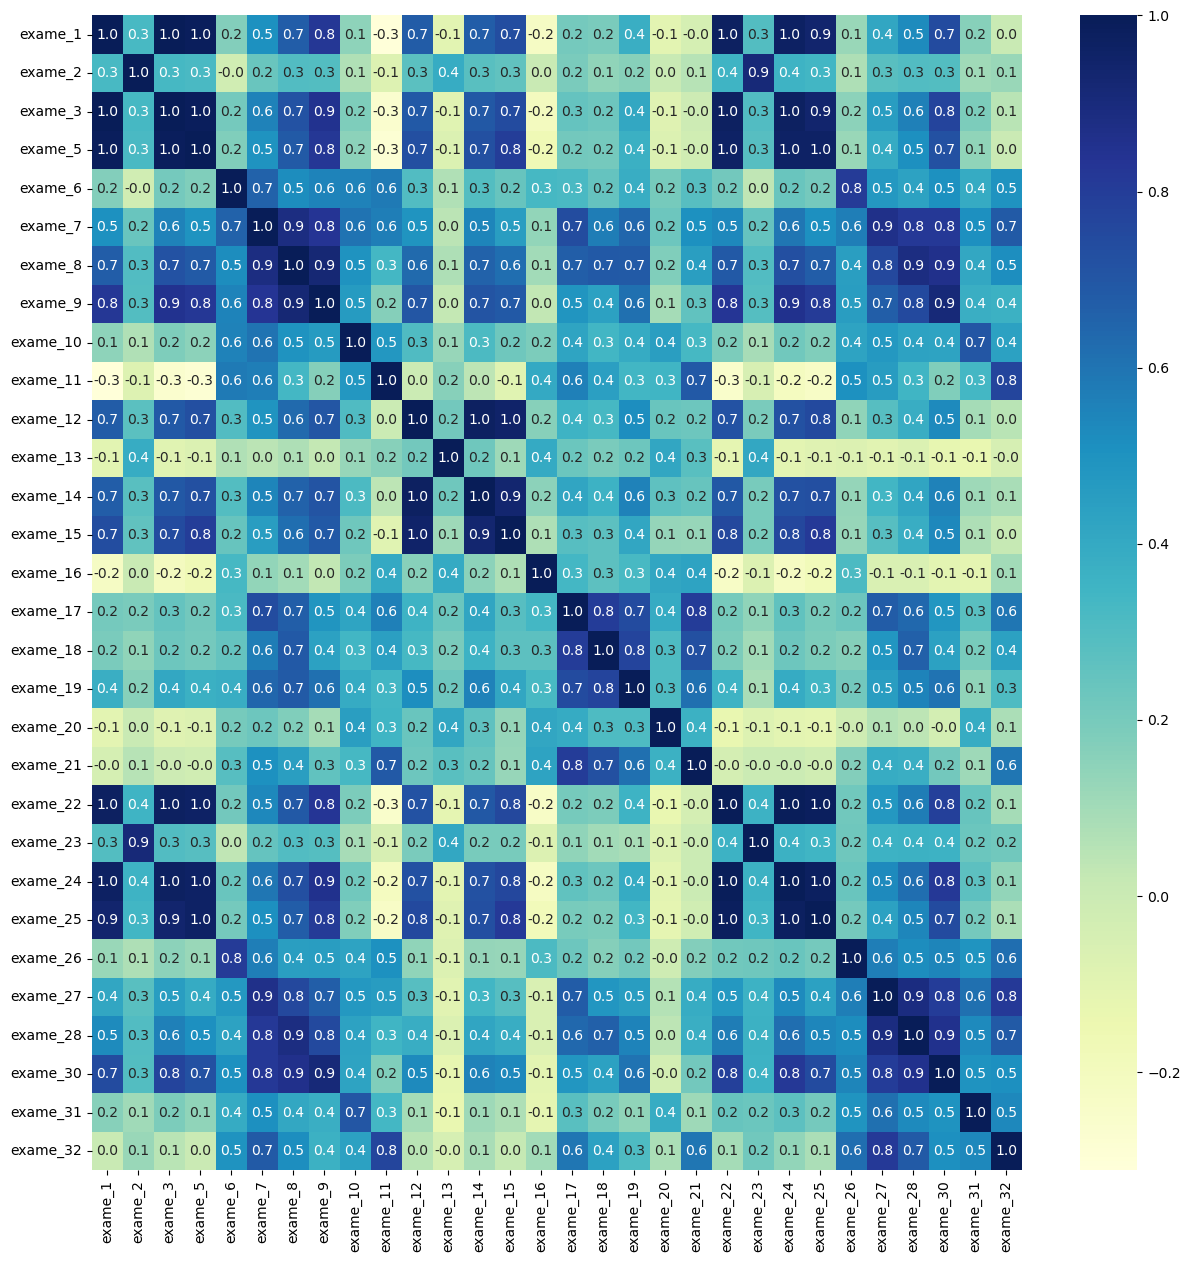

In [60]:
matriz_correlação = valores_exames_v3.corr()
plt.figure(figsize=(15, 15))
ax= sns.heatmap(matriz_correlação, cmap="YlGnBu", annot=True, fmt=".1f")
plt.show()

In [68]:
matriz_correlação_v1 = matriz_correlação[matriz_correlação> 0.99]
matriz_correlação_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Abaixo somente as melhores correlações.

In [69]:
matriz_correlação_v2 = matriz_correlação_v1.sum()
matriz_correlação_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [72]:
variaveis_correlacionadas = matriz_correlação_v2[matriz_correlação_v2 > 1.0]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [73]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())

In [74]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


Obtivemos um resultado um pouco pior do que aquele que vínhamos obtendo, mas por que? Nós descobrimos quais variáveis estavam correlacionadas e excluímos todas elas, mas na verdade não era isso que deveríamos ter feito. Voltando a analisar nossa matriz de correlação, podemos perceber que as features "exame_1" e "exame_3" estão totalmente correlacionadas, da mesma forma que "exame_22" e "exame_24". Sendo assim, removeremos apenas uma feature de cada um desses pares - no caso, "exame_3" e "exame_24", e criaremos um novo dataframe valores_exames_v5 sem elas. Então, mediremos novamente a acurácia do nosso classificador.

In [75]:
valores_exames_v5 = valores_exames_v3.drop(columns=["exame_3", "exame_24"])
classificar(valores_exames_v5)

Resultado da classificação 92.98%


Assim, conseguimos excluir mais duas features sem prejudicarmos nossos resultados, o que é muito interessante. Até o momento, as técnicas aplicadas aqui podem ser aplicadas para qualquer base dados, pois elas têm um caráter de pré-processamento: verificamos e excluímos os valores vazios, os constantes e os de alta correlação.

Temos que ter bastante cuidado ao analisarmos correlações, pois podemos tirar certas conclusões que às vezes não fazem muito sentido. Por exemplo, poderíamos ter concluído que, como "exame_1" e "exame_3" estão altamente correlacionados, o alto valor de "exame_3" é causado por "exame_1". Porém, a associação de correlação e causalidade nem sempre é verdadeira.

Site de correlações esquisitas

O site Tyler Vigen apresenta uma lista muito interessante de "correlações falaciosas" que podem nos ajudar a ilustrar esse ponto. Por exemplo, o número de pessoas que se afogaram em piscinas apresenta uma correlação relativamente alta (66%) com o número de filmes em que Nicolas Cage apareceu naquele ano. Outra correlação falaciosa apresentada é a taxa de divórcios em Maime, que parece diminuir na mesma taxa que o consumo de margarina por pessoa. Desta vez, temos uma correlação altíssima, de 99.26%.

**Quanto mais alta a correlação entre as variáveis tem-se informação duplicada, o que pode contribuir mais com viés no modelo de classificação.**

### Melhores features

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [80]:
selecionador = SelectKBest(chi2, k=5)
selecionador

SelectKBest(k=5, score_func=<function chi2 at 0x0000029450767790>)

Eliminando colunas com valores negativos.

In [86]:
valores_exames_v6 = valores_exames_v1.drop(columns=(["exame_3", "exame_4", "exame_24", "exame_29"]))

In [91]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
selecionador.fit(treino_x, treino_y)
treino = selecionador.transform(treino_x)
teste = selecionador.transform(teste_x)

In [92]:
teste.shape

(171, 5)

O último resultado que obtivemos antes desse tratamento foi de 92.98%, quando havíamos excluído apenas 4 features. Dessa vez, temos 92.40% utilizando apenas 5 features, uma redução de 85% do nosso conjunto de dados.

In [95]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste,teste_y)*100))

Resultado da classificação 92.40%


## Matriz de confusão

In [98]:
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

**Temos 0 quando o diagnóstico é de um câncer benigno e 1 quando é de um câncer maligno.**
 De 105 casos benignos, nosso modelo acertou 100, classificando o restante (5) como maligno.
    Já nos casos de cânceres malignos, nosso modelo acertou 58, classificando 8 como benignos. 

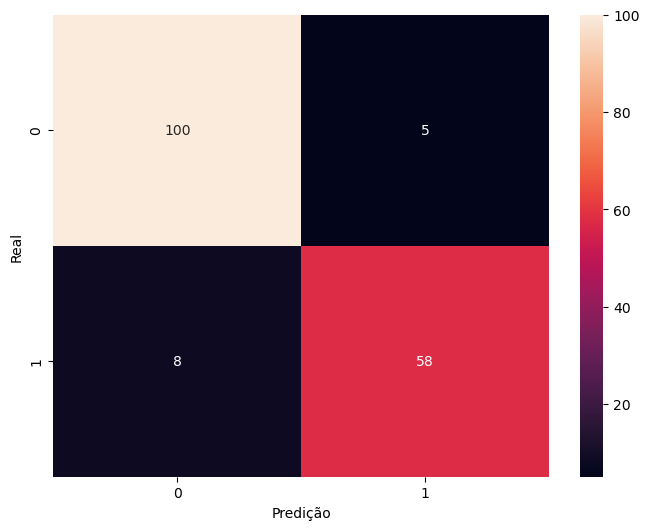

In [107]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d")
ax.set_xlabel("Predição")
ax.set_ylabel("Real")
plt.show()

## Seleção RFE

Nessa nova técnica, por meio da acurácia, que será nossa forma de avaliação, nosso classificador saberá qual das features é mais importante pra ele, descartando as de menor acurácia. Esse processo será feito sucessivamente até atingir o número de features selecionado - no no nosso caso, 5. Esse modelo, que implementaremos em Python, é chamado de RFE - Recursive Feature Elimination, algo como "Eliminação de Feature por Recursão".

In [116]:
from sklearn.feature_selection import RFE


SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
selecionador.fit(treino_x, treino_y)


selecao_rfe = RFE(estimator = classificador, n_features_to_select=5, step=1)
selecao_rfe.fit(treino_x, treino_y)
treino_rfe = selecao_rfe.transform(treino_x)
teste_rfe = selecao_rfe.transform(teste_x)


classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)


RandomForestClassifier(random_state=1234)

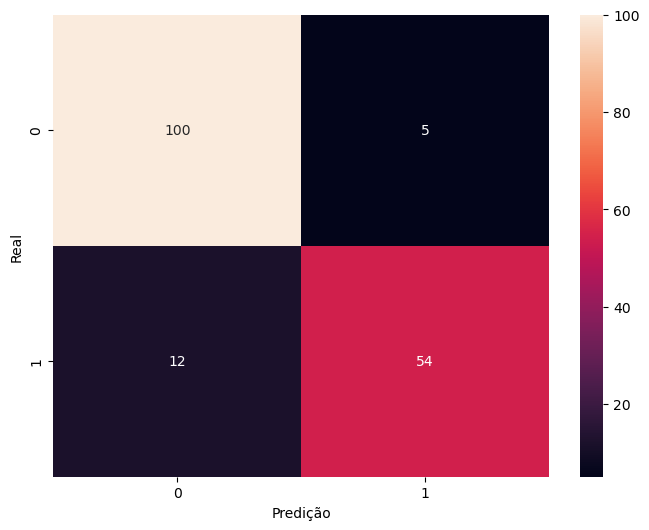

In [119]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao
plt.figure(figsize=(8, 6))
ax = sns.heatmap(matriz_confusao, annot=True, fmt="d")
ax.set_xlabel("Predição")
ax.set_ylabel("Real")
plt.show()

In [120]:
classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação %.2f%%" %(classificador.score(teste_rfe,teste_y)*100))

Resultado da classificação 90.06%


**Impotante**
Quais as diferenças entre os métodos automatizados (SelectKbest e REF) e as formas analíticas (Detecção de valores não preenchidos, valores constantes e correlacionados) utilizadas até o momento?

O método automatizado necessita do número de atributos que serão mantidos e depende de alguma forma de avaliação para cada atributo, por exemplo: o SelectKbest que utiliza uma função para gerar uma pontuação dos atributos (features), assim selecionando os K melhores. Métodos análiticos identificam certos aspectos nos dados como correlação entre os atributos, valores constantes e valores vazios, para então tratar manualmente os respectivos atributos.
